In [1]:
import pandas as pd
from google.colab import drive
df= pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [2]:
print(df.head)

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [3]:
print(df.duplicated().sum())
print(df.size)

0
147903


In [4]:
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Data Preprocessing
# Replace empty strings in TotalCharges with NaN and convert to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [7]:
#convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [8]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

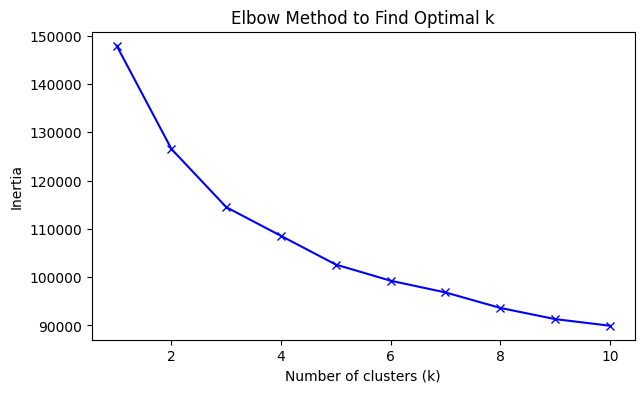

In [9]:
#Determine the optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

In [10]:
#Fit K-Means Model (choose k=2 since we want churn vs non-churn)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [12]:
#Adding cluster labels to dataset
df['Cluster'] = y_kmeans

/tmp/ipython-input-1109723689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='coolwarm')


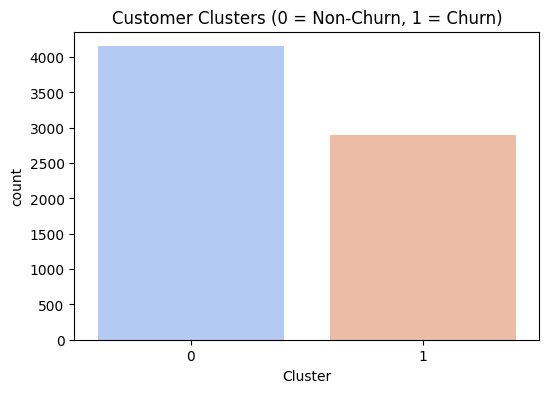

In [13]:
#Visualize cluster distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette='coolwarm')
plt.title("Customer Clusters (0 = Non-Churn, 1 = Churn)")
plt.show()

In [14]:
#Compare average churn label with clusters
if 'Churn' in df.columns:
    print("\nCluster vs Actual Churn Distribution:")
    print(pd.crosstab(df['Cluster'], df['Churn']))


Cluster vs Actual Churn Distribution:
Churn       0     1
Cluster            
0        2592  1559
1        2582   310
